<a href="https://colab.research.google.com/github/StanleyLiangYork/DeepLearningForMalaria/blob/master/Prepare_3_class_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu

In [1]:
!gsutil cp gs://pet-detect-239118/dogs-vs-cats.zip ./dogs-vs-cats.zip
!gsutil cp gs://pet-detect-239118/malaria.zip ./malaria.zip

Copying gs://pet-detect-239118/dogs-vs-cats.zip...
/ [1 files][812.1 MiB/812.1 MiB]   58.9 MiB/s                                   
Operation completed over 1 objects/812.1 MiB.                                    
Copying gs://pet-detect-239118/malaria.zip...
\ [1 files][ 60.5 MiB/ 60.5 MiB]                                                
Operation completed over 1 objects/60.5 MiB.                                     


In [0]:
import os
import zipfile

with zipfile.ZipFile('malaria.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()


In [0]:
import os
import zipfile

with zipfile.ZipFile('dogs-vs-cats.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [0]:
import os
import zipfile

with zipfile.ZipFile('train.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [4]:
import pathlib

data_dir = './train'
data_dir = pathlib.Path(data_dir)
imagelist = list(data_dir.glob('*.jpg'))
image_count = len(list(data_dir.glob('*.jpg')))
print('total amount of images in the test set: ', image_count)

total amount of images in the test set:  25000


In [12]:
filelist = []
for filename in imagelist:
  path = str(filename)
  filelist.append(path)

print(type(filelist[0]))

<class 'str'>


(12410, 3)
(12410, 32, 32, 3)
(12410, 3)
[[0 0 1]]


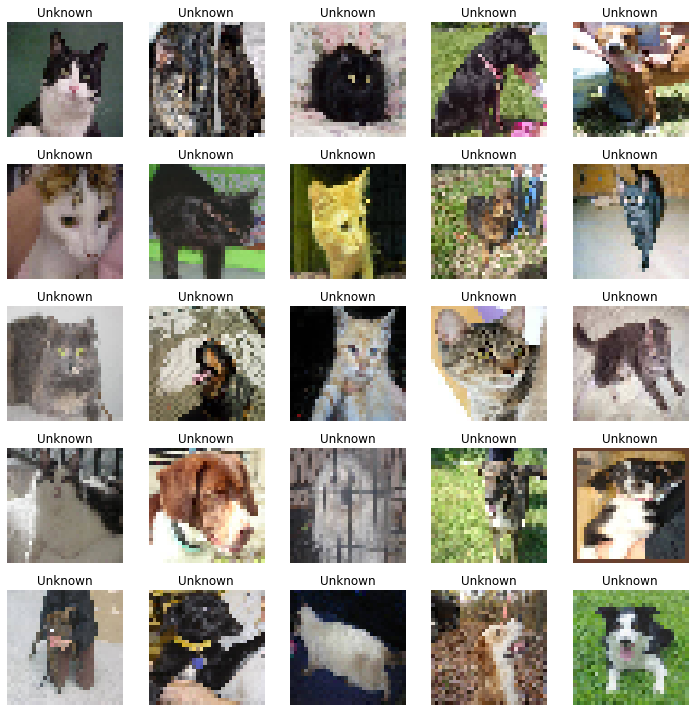

In [53]:
from matplotlib import pyplot as plt
from matplotlib.image import imread
import pathlib
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import os
import numpy as np
from numpy import zeros


tags = ['Parasitemic', 'Uninfected', 'Unknown']
row = 12410
encoding_1 = zeros((row,3), dtype='uint8')
print(encoding_1.shape)
encoding_1[:,2] = 1

photos=[]

for i, filename in enumerate(imagelist):
  if i >= 12410:
    break
  photo = load_img(filename, target_size=(32,32))
  photo = img_to_array(photo, dtype='uint8')
  photos.append(photo)



X_fake = np.asarray(photos, dtype='uint8')
Y_fake = np.asarray(encoding_1, dtype='uint8')

print(X_fake.shape)
print(Y_fake.shape)
print(Y_fake[0:1])

plt.figure(figsize=(10,10))

for i, image in enumerate(X_fake[:25]):
  plt.subplot(5,5, i+1)
  plt.title('Unknown')
  plt.imshow(image)
  plt.axis('off')

plt.tight_layout()
plt.show() 


In [32]:
import pathlib
import random

data_dir = './malaria' 
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.png')))
image_list = list(data_dir.glob('*/*.png'))
print('total amount of images in the malaria set: ', image_count)

total amount of images in the malaria set:  24820


(24820, 3)
(24820, 32, 32, 3)
(24820, 3)
[0 1 0]


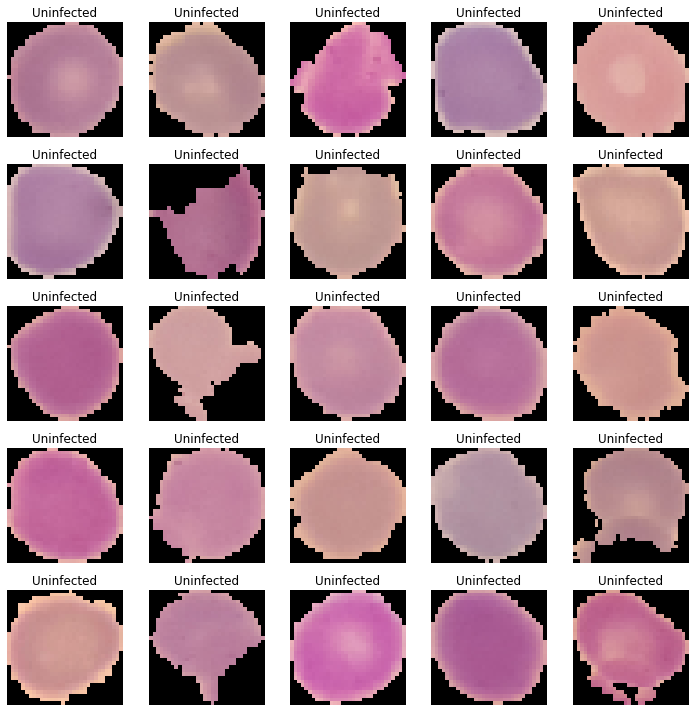

In [46]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from numpy import zeros
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np


tags = ['Parasitemic', 'Uninfected', 'Unknown']
row = len(image_list)
encoding_2 = zeros((row,3), dtype='uint8')
print(encoding_2.shape)


RBC_images = []
for i, imgpath in enumerate(image_list):
  imgpath = str(imgpath)
  label = imgpath.split('/')[1]
  if label == tags[0]:
    encoding_2[i][0] = 1
  else:
    encoding_2[i][1] = 1

  photo = load_img(imgpath, target_size=(32,32))
  photo = img_to_array(photo, dtype='uint8')
  RBC_images.append(photo)

X_RBC = np.asarray(RBC_images, dtype='uint8')
Y_RBC = np.asarray(encoding_2, dtype='uint8')

print(X_RBC.shape)
print(Y_RBC.shape)
print(Y_RBC[0])

plt.figure(figsize=(10,10))

for i, image in enumerate(X_RBC[:25]):
  plt.subplot(5,5, i+1)
  if Y_RBC[i][0] == 1:
    plt.title('Parasitemic')
  else:
    plt.title('Uninfected')
  plt.imshow(image)
  plt.axis('off')

plt.tight_layout()
plt.show()  

(37230, 32, 32, 3)
(37230, 3)


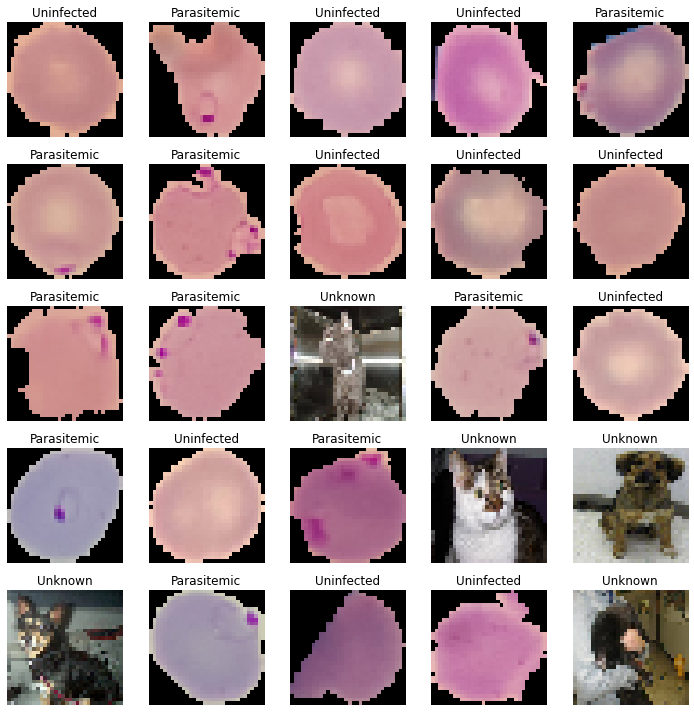

In [57]:
import numpy as np
from sklearn.utils import shuffle

X = np.concatenate((X_RBC, X_fake), axis=0)
Y = np.concatenate((Y_RBC, Y_fake), axis=0)

print(X.shape)
print(Y.shape)

X_shuffle, Y_shuffle = shuffle(X, Y, random_state=100)

plt.figure(figsize=(10,10))

for i, image in enumerate(X_shuffle[:25]):
  plt.subplot(5,5, i+1)
  if Y_shuffle[i][0] == 1:
    plt.title('Parasitemic')
  elif Y_shuffle[i][1] == 1:
    plt.title('Uninfected')
  else:
    plt.title('Unknown')
  plt.imshow(image)
  plt.axis('off')

plt.tight_layout()
plt.show()  

np.savez_compressed('malaria_3_class_data.npz', X_shuffle, Y_shuffle)

Start from here is the dataset is available

In [0]:
from numpy import load
import os

if not os.path.exists('malaria_3_class_data.npz'):
    !gsutil cp gs://pet-detect-239118/malaria_3_class_data.npz ./malaria_3_class_data.npz


# load the real images
def load_dataset():
   data = load('./malaria_3_class_data.npz')
   X = data['arr_0']
   Y = data['arr_1']
   return X, Y


In [3]:
from sklearn.model_selection import train_test_split
X, Y = load_dataset()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
print(X_train.shape)
print(X_test.shape)

(29784, 32, 32, 3)
(7446, 32, 32, 3)


In [0]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import BatchNormalization


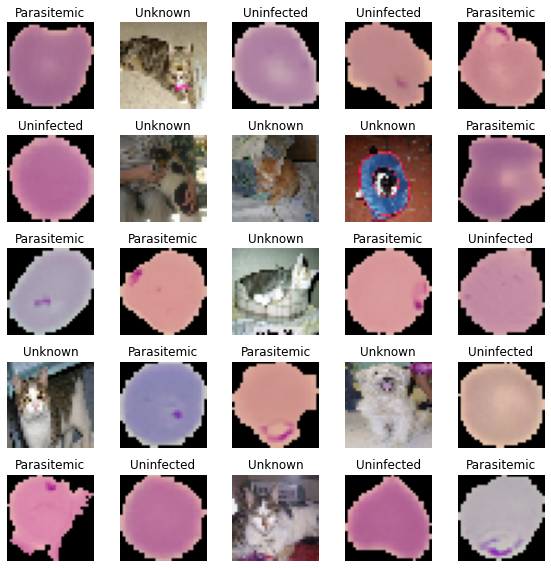

In [5]:
# plot first few images
plt.figure(figsize=(8, 8))
for i in range(25):
  # define subplot
  plt.subplot(5,5, 1+i)
  # plot raw pixel data
  plt.imshow(X_train[i])
  plt.axis('off')
  if y_train[i][0] == 1:
    plt.title('Parasitemic')
  elif y_train[i][1] == 1:
    plt.title('Uninfected')
  else:
    plt.title('Unknown')
plt.tight_layout()
plt.show()

In [0]:
def prep_pixels(train, test):
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  return train_norm, test_norm

In [0]:
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.3))
  model.add(Flatten()) 
  model.add(Dense(128, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(256, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(3, activation='softmax'))
  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [0]:
def summarize_diagnostics(history):
  plt.figure(figsize=(10, 10))
  # plot loss
  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'], color='blue', label='Training')
  plt.plot(history.history['val_loss'], color='orange', label='Test')
  plt.legend(loc='lower right')
  plt.title('Cross Entropy Loss')
  # plot accuracy
  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'], color='blue', label='Training')
  plt.plot(history.history['val_accuracy'], color='orange', label='Test')
  plt.legend(loc='lower right')
  plt.title('Classification Accuracy')
  plt.show()

In [0]:
trainX, testX = prep_pixels(X_train, X_test)

model = define_model()


Train on 29784 samples, validate on 7446 samples
Epoch 1/60
29784/29784 - 5s - loss: 0.3974 - accuracy: 0.8246 - val_loss: 3.5995 - val_accuracy: 0.3356
Epoch 2/60
29784/29784 - 2s - loss: 0.1880 - accuracy: 0.9222 - val_loss: 4.1274 - val_accuracy: 0.3356
Epoch 3/60
29784/29784 - 2s - loss: 0.1394 - accuracy: 0.9423 - val_loss: 0.9596 - val_accuracy: 0.6469
Epoch 4/60
29784/29784 - 2s - loss: 0.1148 - accuracy: 0.9544 - val_loss: 1.0138 - val_accuracy: 0.5410
Epoch 5/60
29784/29784 - 2s - loss: 0.0913 - accuracy: 0.9653 - val_loss: 1.6943 - val_accuracy: 0.4522
Epoch 6/60
29784/29784 - 2s - loss: 0.0833 - accuracy: 0.9682 - val_loss: 1.4009 - val_accuracy: 0.5466
Epoch 7/60
29784/29784 - 2s - loss: 0.0731 - accuracy: 0.9734 - val_loss: 0.6457 - val_accuracy: 0.7749
Epoch 8/60
29784/29784 - 2s - loss: 0.0658 - accuracy: 0.9764 - val_loss: 0.2352 - val_accuracy: 0.9087
Epoch 9/60
29784/29784 - 2s - loss: 0.0539 - accuracy: 0.9801 - val_loss: 0.3113 - val_accuracy: 0.8595
Epoch 10/60
297

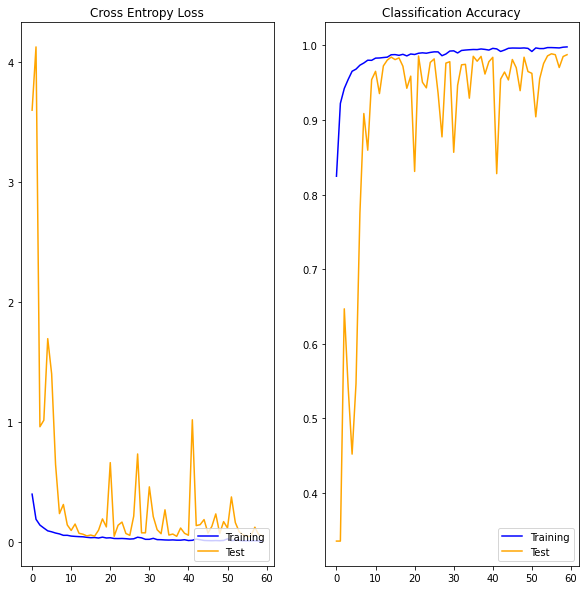

In [10]:
history = model.fit(trainX, y_train, epochs=60, batch_size=512, validation_data=(testX, y_test), verbose=2)
loss, acc = model.evaluate(testX, y_test, verbose=0)
print("loss: {:6.3f}, accuracy: {:6.3f}%".format(loss, acc*100))

summarize_diagnostics(history)

In [0]:
model.save('RBC_classifier.h5')